# Sources of variation and the central limit theroem

In [80]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
colors = ('#00876c', '#3d9a70', '#64ad73', '#89bf77', '#afd17c', 
          '#d6e184', '#fff18f', '#fdd576', '#fbb862', '#f59b56', 
          '#ee7d4f', '#e35e4e', '#d43d51')

In [21]:
def plot_dist(dist, color=None):
    plt.plot(dist, c=color)
    plt.fill_between(range(len(dist)), [0]*len(dist), dist, color=color)
    ax = plt.gca()
    ax.axis('off')

In [54]:
dist_list = [stats.binom(5,0.4).pmf(np.linspace(-1,5,121)),
             stats.norm.pdf(np.linspace(-10,10,100)),
             stats.pearson3.pdf(np.linspace(-10,10,100), 0.5),
             stats.gamma.pdf(np.linspace(-10,10,100), 1.99),
             stats.alpha.pdf(np.linspace(-2,2,100), 3.57),
             stats.burr.pdf(np.linspace(4,-2,100), 10.5,4.3),
             stats.gennorm.pdf(np.linspace(4,-4,100), 1.3),
             stats.lognorm.pdf(np.linspace(0,4,100), 0.4),
             stats.norm.pdf(np.linspace(-20,20,100)),
             stats.norm.pdf(np.linspace(-15,21,100)),
             stats.norm.pdf(np.linspace(-10,15,100)),
            stats.norm.pdf(np.linspace(-30,40,100)),
            stats.norm.pdf(np.linspace(-30,30,100))]

# adding sources of variation
Note that adding two random variables is equvalent to convolving their PDFs, here the PDFs are stored numerically as above.

In [78]:
def central_limit(dist_list):
    global_dist = np.array([1.0], dtype = float)
    total_len = 1*100*len(dist_list)
    i = 0
    for dist in dist_list:
        plot_dist(dist, colors[i])
        plt.gcf().savefig(f'dist{i}.png', dpi = 300)
        plt.cla()
        global_dist = np.convolve(global_dist, dist)
        plot_dist(np.pad(global_dist, [total_len-len(global_dist)//2]*2, constant_values=0)[1150:-1150], 
                  colors[i])
        plt.gcf().savefig(f'total_dist{i}.png', dpi = 300)
        plt.cla()
        i += 1

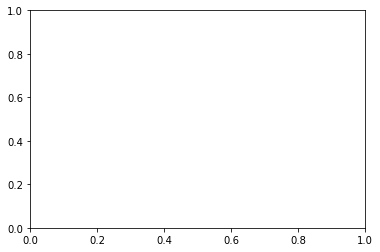

In [79]:
central_limit(dist_list)

# Illustration of the central limit theorem for growth rates
This is more complicated to do for teh PDFs so we will just use monte carlo sampling through each of the distributions and multiply the random values by eachother plus some off set. This off set makes sure that they are more like growth rates than straight multiplications (none should be negative) 

In [152]:
dist_list = [stats.binom(5,0.4),
             stats.norm(loc = 2, scale = 2),
             stats.pearson3(0.5),
             stats.gamma(1.99),
             stats.alpha(3.57),
             stats.burr(10.5,4.3),
             stats.gennorm(1.3),
             stats.norm(0.4),
             stats.norm(5),
             stats.norm(10),
             stats.norm(2),
             stats.norm(10),
             stats.norm(10),
             stats.norm(10)]

In [157]:
def log_central_limit(dist_list, length = 100000):
    dist = dist_list[0]
    global_dist = dist.rvs(length)
    i=0
    for dist in dist_list[1:]:
        mean = np.mean(global_dist)
        std = np.std(global_dist)
        dist_to_plot = global_dist[np.logical_and(global_dist>0, global_dist<mean+3*std)]
        ax = sns.distplot(dist_to_plot,
                          hist=False, color = colors[i], 
                          kde_kws={"shade": True})
        ax.axis('off')
        plt.gcf().savefig(f'total_log_dist{i}.png', dpi = 300)
        plt.cla()
        global_dist = global_dist*(2+dist.rvs(length))
        i += 1

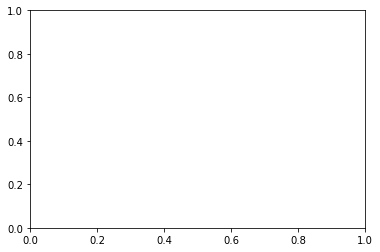

In [158]:
log_central_limit(dist_list)

In [159]:
dist_list = [stats.lognorm.pdf(np.linspace(0,4,100), 0.4)]*13

In [163]:
def central_limit(dist_list):
    global_dist = np.array([1.0], dtype = float)
    total_len = 1*100*len(dist_list)
    i = 0
    for dist in dist_list:
        #plot_dist(dist, colors[i])
        #plt.gcf().savefig(f'dist{i}.png', dpi = 300)
        #plt.cla()
        global_dist = np.convolve(global_dist, dist)
        plot_dist(np.pad(global_dist, [total_len-len(global_dist)//2]*2, constant_values=0), 
                  colors[i])
        #plt.gcf().savefig(f'total_dist{i}.png', dpi = 300)
        #plt.cla()
        i += 1

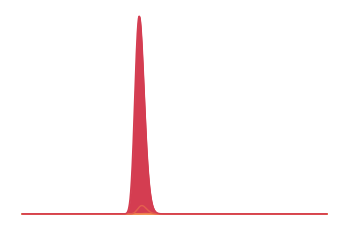

In [164]:
central_limit(dist_list)